# INTRODUCCION

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos. 
Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Mi tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.



## Análisis exploratorio de datos (Python)

In [1]:
#import libraries

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans



In [2]:
# Cargar Dataset
gym = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
# Revisar por valores nulos
print("\nValores nulos en gym:")
print(gym.isnull().sum())


Valores nulos en gym:
gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


In [5]:
# Verificar si hay valores duplicados
print(gym.duplicated().sum())

0


In [6]:
# Calcular promedio y desviacion estandar
stats_summary = gym.describe()
print("Statistical Summary:\n", stats_summary)

Statistical Summary:
             gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%       

In [7]:
# Group by 'Churn' and calculate the mean for each group
grouped_means = gym.groupby('Churn').mean()

# Print the mean values for each group
print("Mean values for each group:\n", grouped_means)

Mean values for each group:
          gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0     

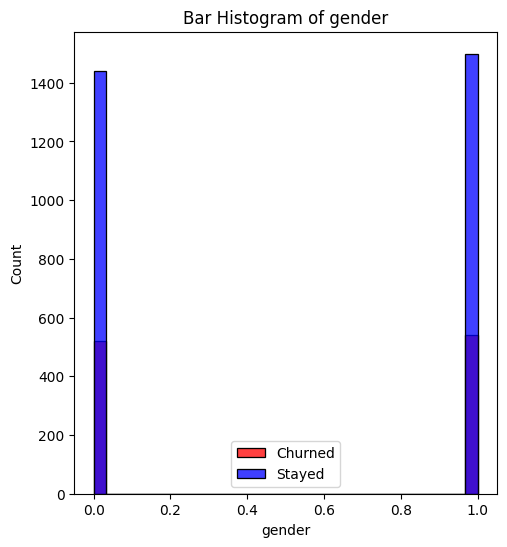

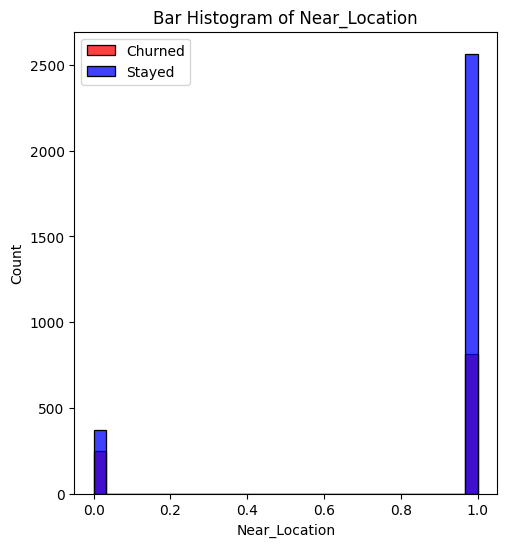

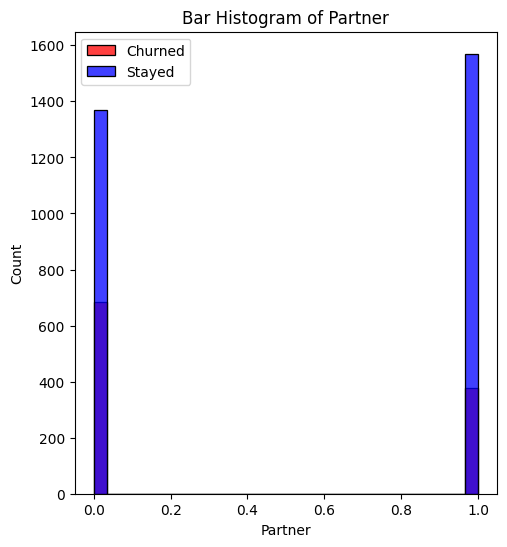

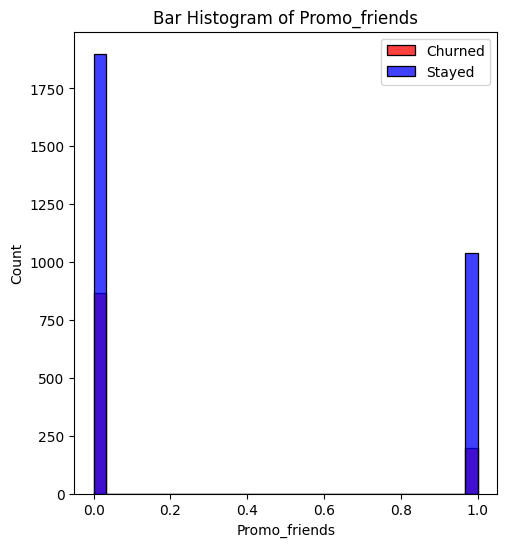

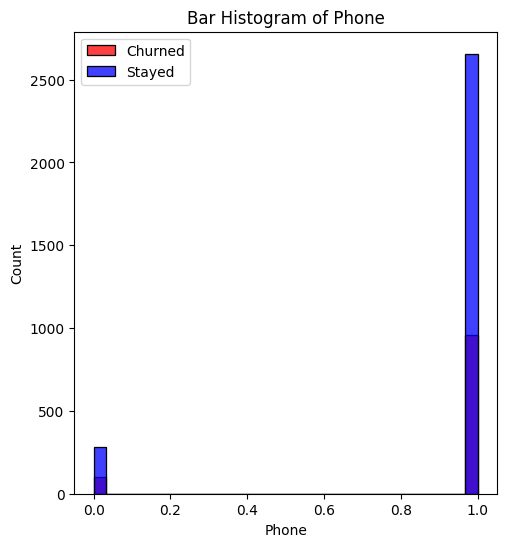

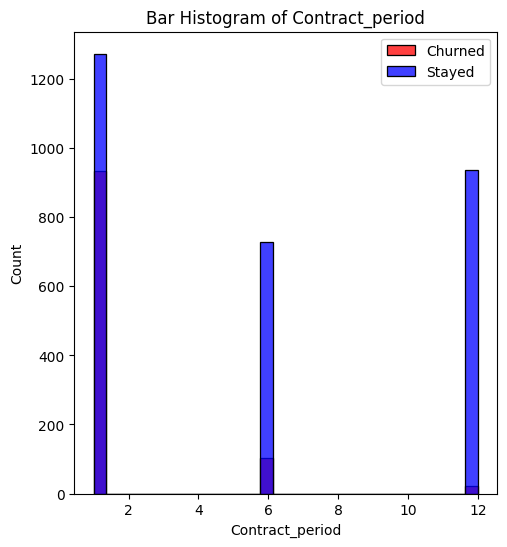

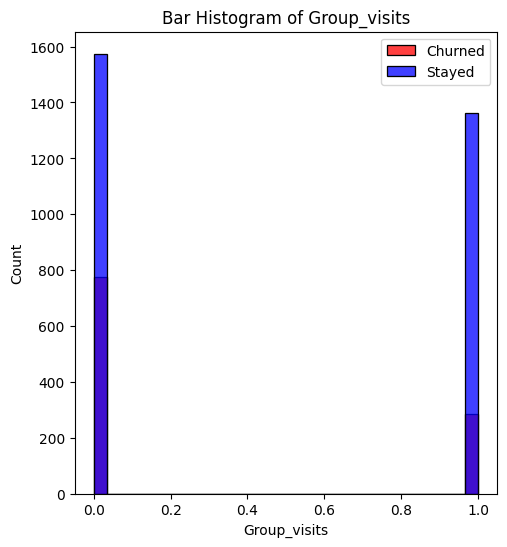

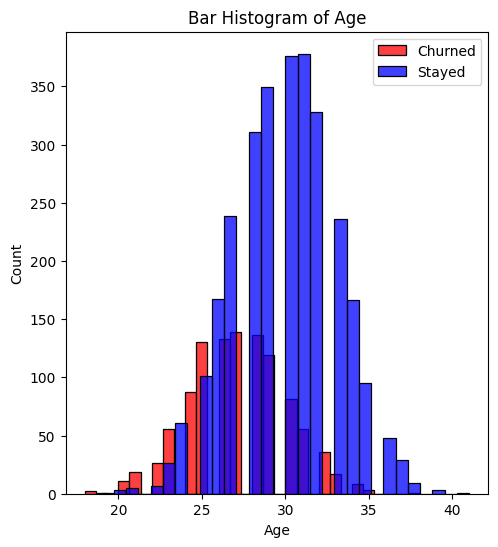

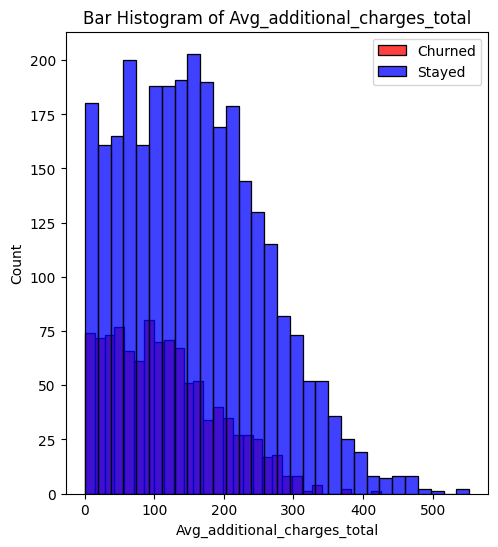

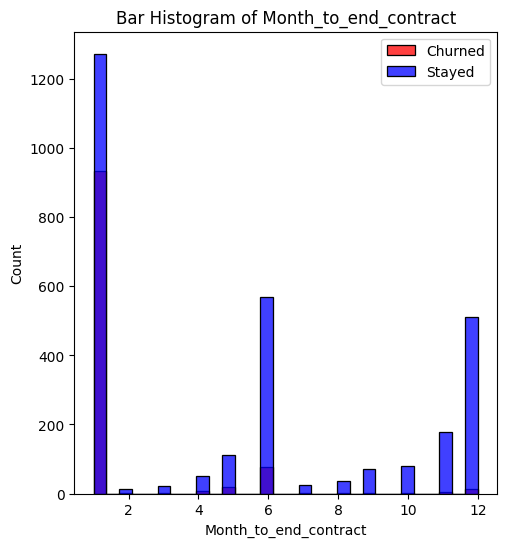

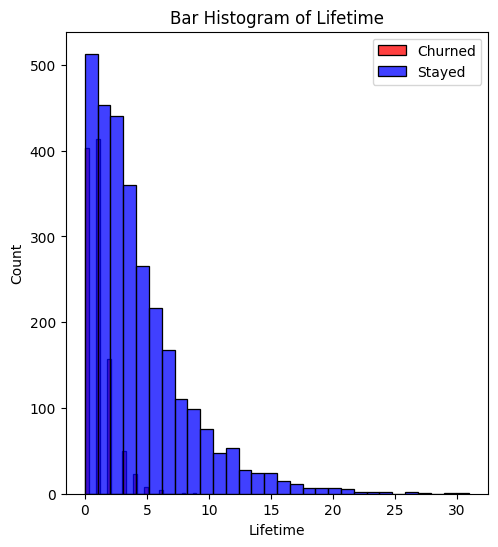

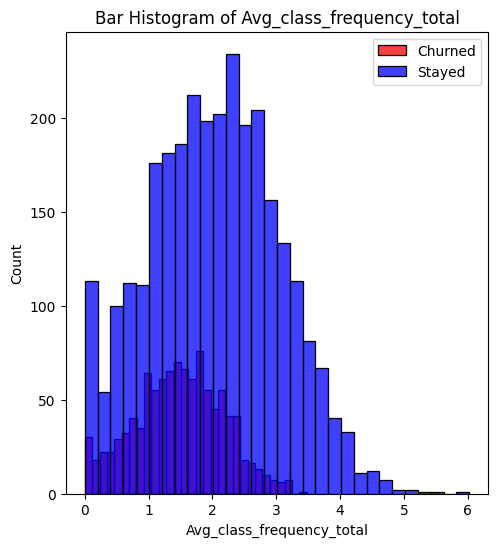

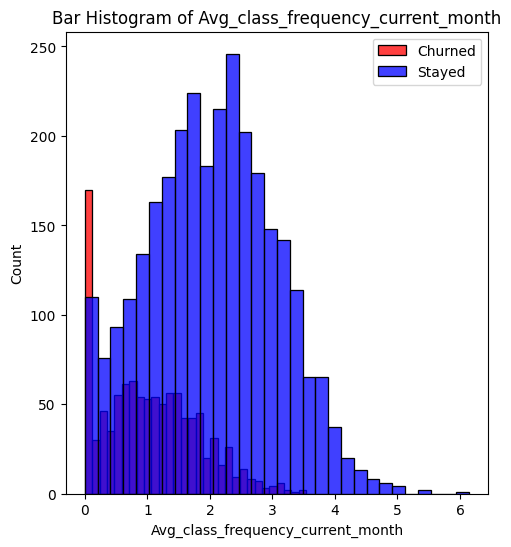

In [8]:
# Separate the data into churned and stayed groups
churned = gym[gym['Churn'] == 1]
stayed = gym[gym['Churn'] == 0]

# Plot bar histograms and distributions for each feature
features = gym.columns.drop('Churn')

for feature in features:
    plt.figure(figsize=(12, 6))
    
    # Bar histogram
    plt.subplot(1, 2, 1)
    sns.histplot(churned[feature], color='red', label='Churned', kde=False, bins=30)
    sns.histplot(stayed[feature], color='blue', label='Stayed', kde=False, bins=30)
    plt.title(f'Bar Histogram of {feature}')
    plt.legend()
    

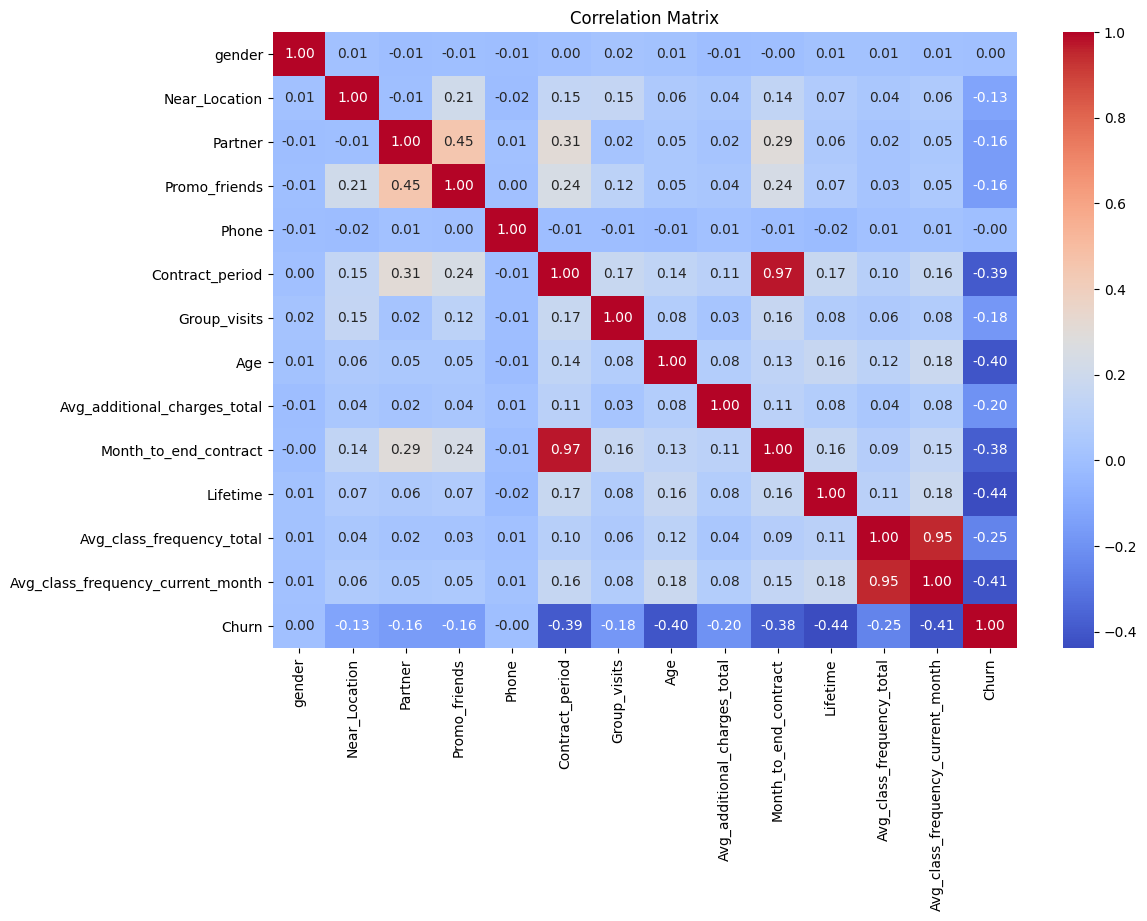

In [9]:
# Create the correlation matrix
correlation_matrix = gym.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

##  Construir un modelo para predecir la cancelación de usuarios


Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.

In [10]:
# Split the data into features and target
X = gym.drop('Churn', axis=1)
y = gym['Churn']



In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [12]:
# Create the models
models = {
    'logistic_regression': LogisticRegression(),
    'random_forest': RandomForestClassifier(),
    
}



In [13]:
# Train the models and get probabilities
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
 # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f"{name.capitalize()} Model:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print("\n")




Logistic_regression Model:
Accuracy: 0.91625
Precision: 0.8729281767955801
Recall: 0.7821782178217822


Random_forest Model:
Accuracy: 0.9175
Precision: 0.8655913978494624
Recall: 0.7970297029702971




In [14]:
# Compare the models
best_model = max(models, key=lambda name: accuracy_score(y_test, models[name].predict(X_test)))
print(f"The best model is: {best_model.capitalize()}")

The best model is: Random_forest


## Crear clústeres de usuarios/as

Deja de lado la columna con datos sobre la cancelación e identifica los clústeres de objetos (usuarios/as):

In [15]:
# Drop the 'Churn' column
Xc = gym.drop('Churn', axis=1)

# Standardize the data
X_scaled = scaler.fit_transform(Xc)

# Create a linkage matrix
linkage_matrix = linkage(X_scaled, method='ward')


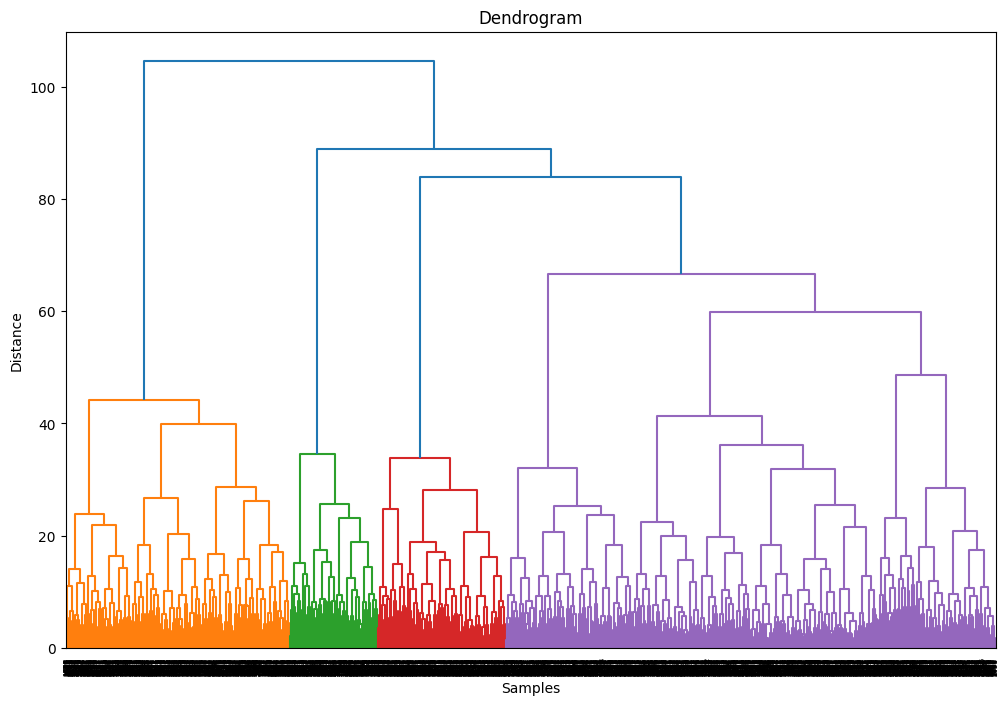

In [16]:

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()



In [17]:
# Train the K-means model with n=5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)



In [18]:
# Add the cluster labels to the original dataframe
gym['Cluster'] = clusters



In [19]:
# Calculate the mean values of features for each cluster
cluster_means = gym.groupby('Cluster').mean()
print("Mean values for each cluster:\n", cluster_means)




Mean values for each cluster:
            gender  Near_Location   Partner  Promo_friends  Phone  \
Cluster                                                            
0        0.502370       0.949447  0.829384       0.998420    1.0   
1        0.554556       0.849269  0.263217       0.052868    1.0   
2        0.499422       0.937572  0.737572       0.478613    1.0   
3        0.485738       0.718011  0.299919       0.018745    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         Contract_period  Group_visits        Age  \
Cluster                                             
0               3.097946      0.448657  29.104265   
1               2.606299      0.436445  30.008999   
2              11.854335      0.546821  29.905202   
3               1.914425      0.276284  28.083945   
4               4.777202      0.427461  29.297927   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
Cluster                                       

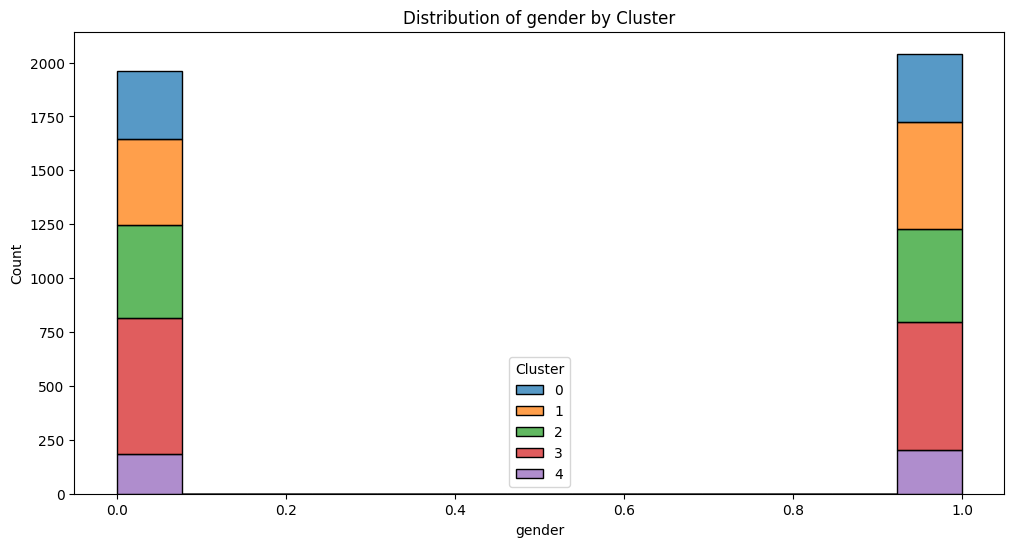

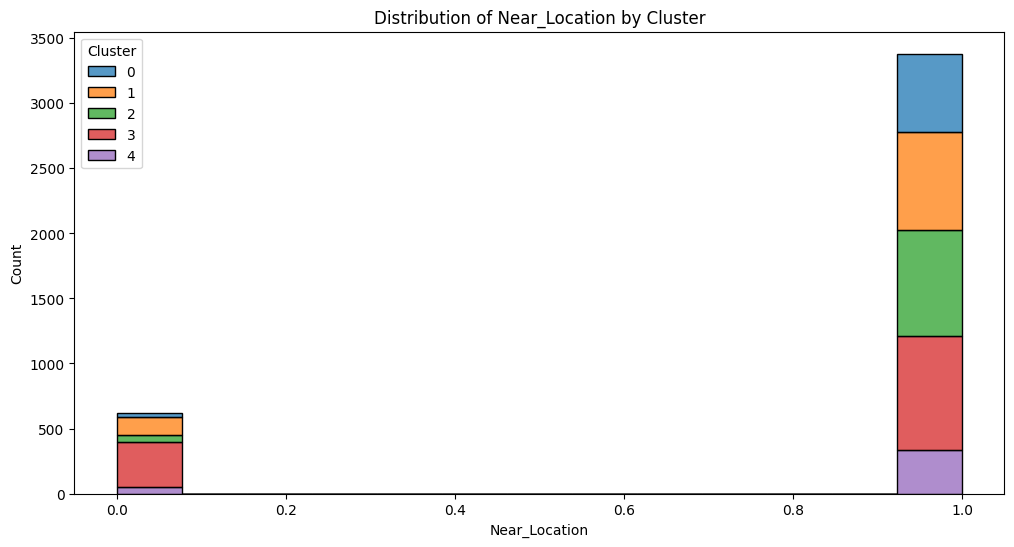

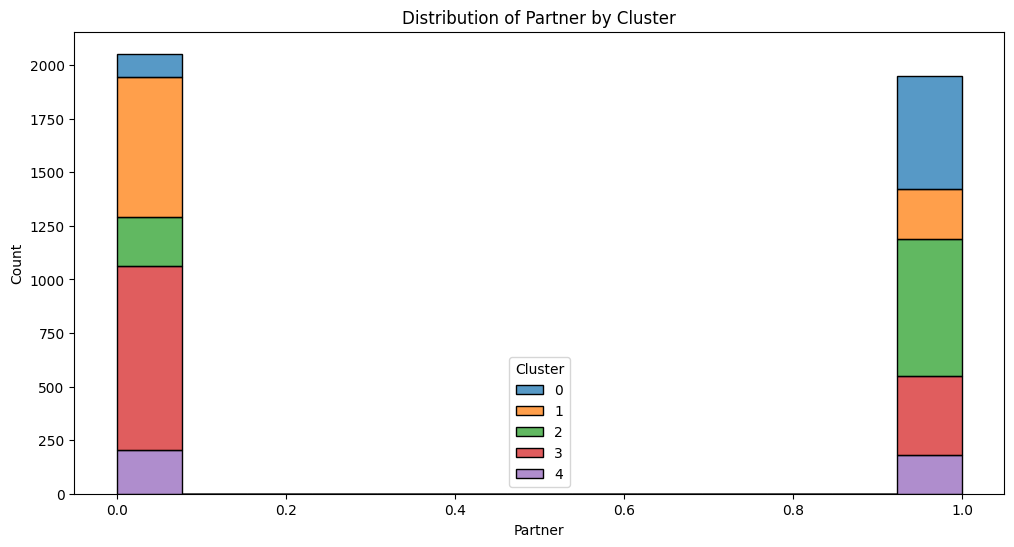

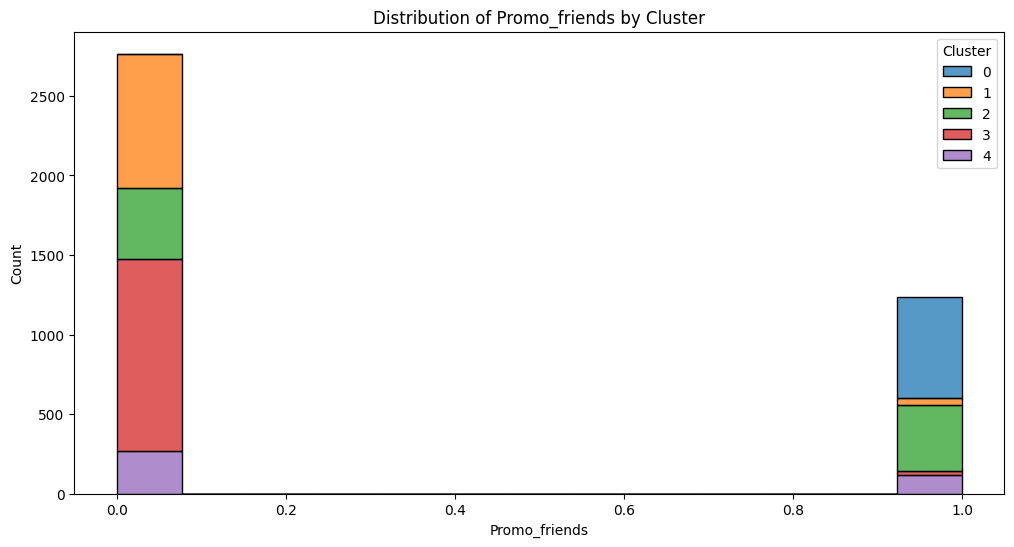

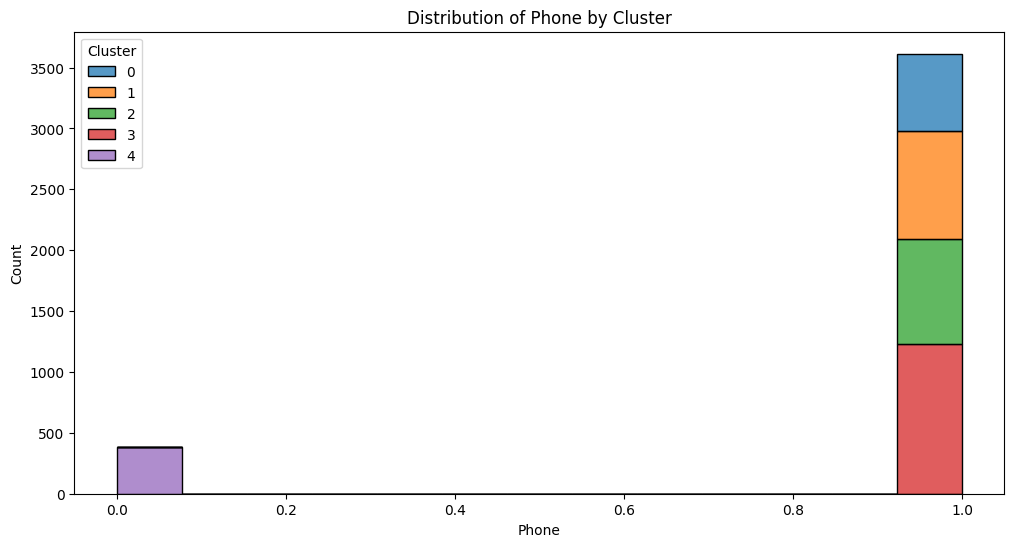

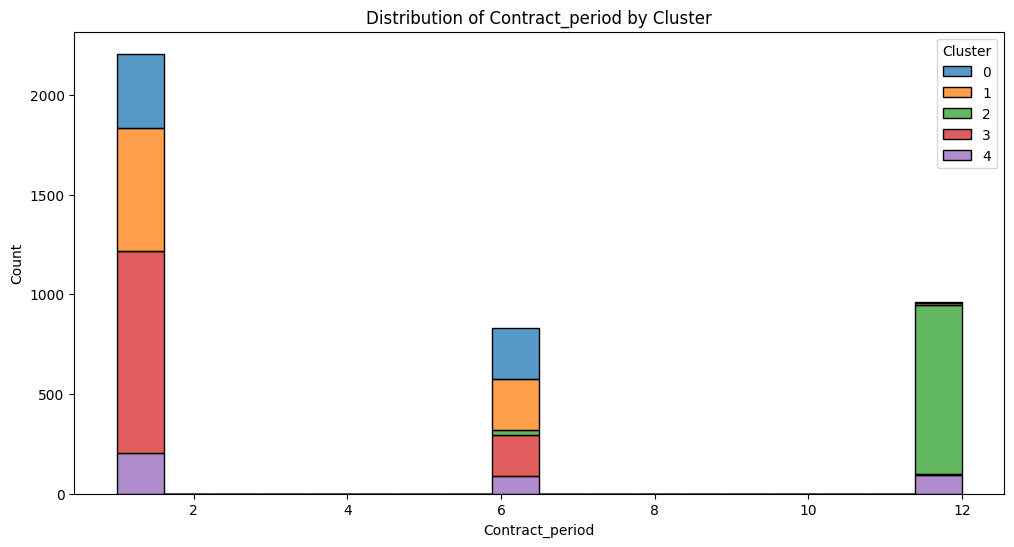

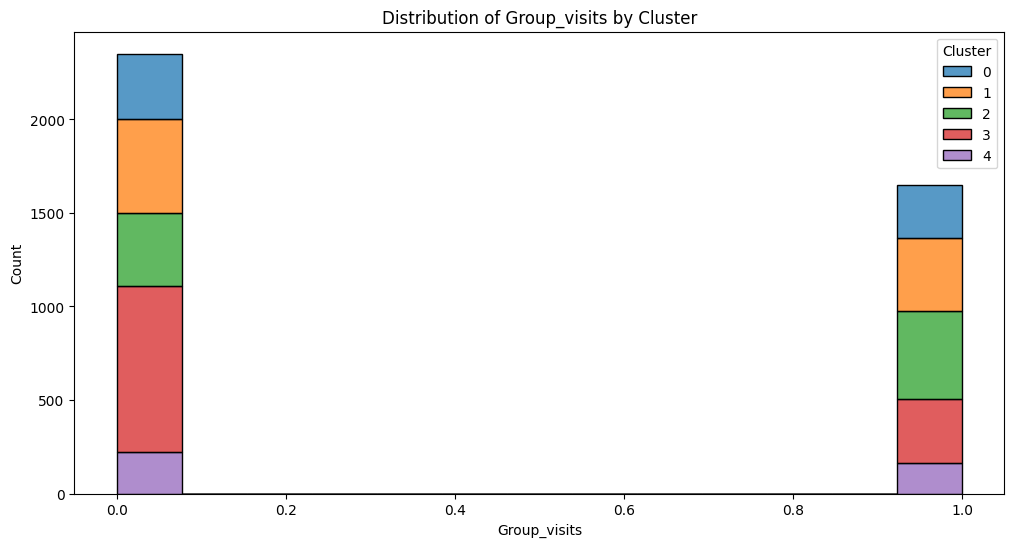

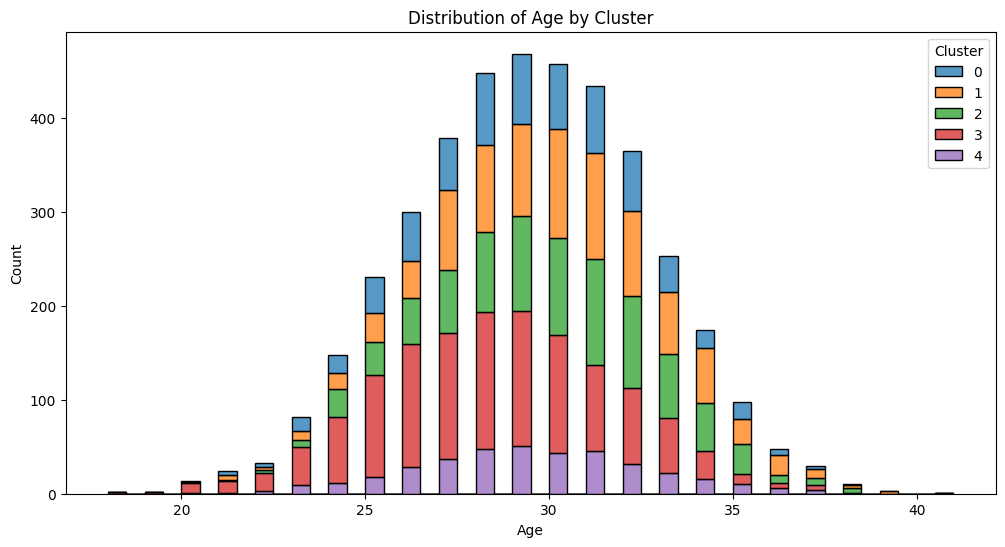

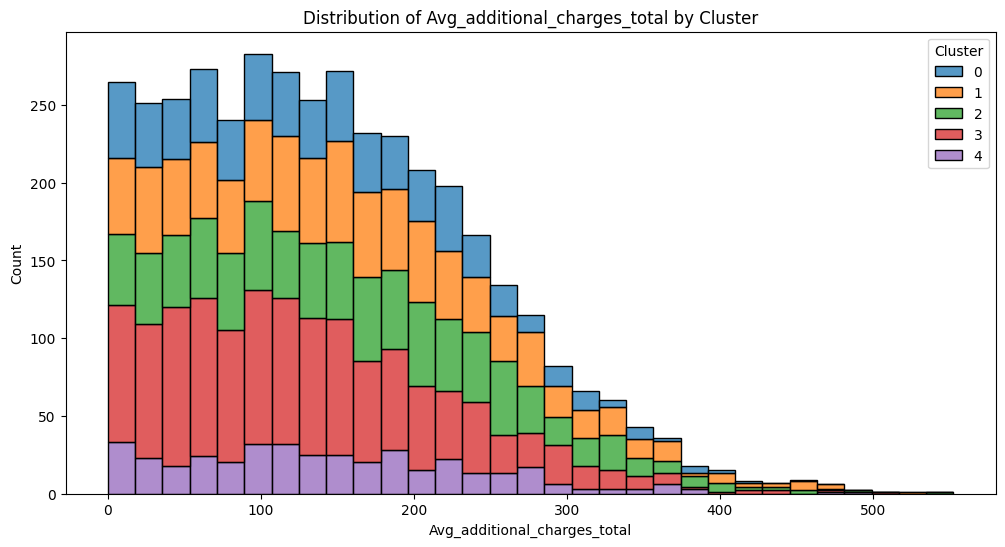

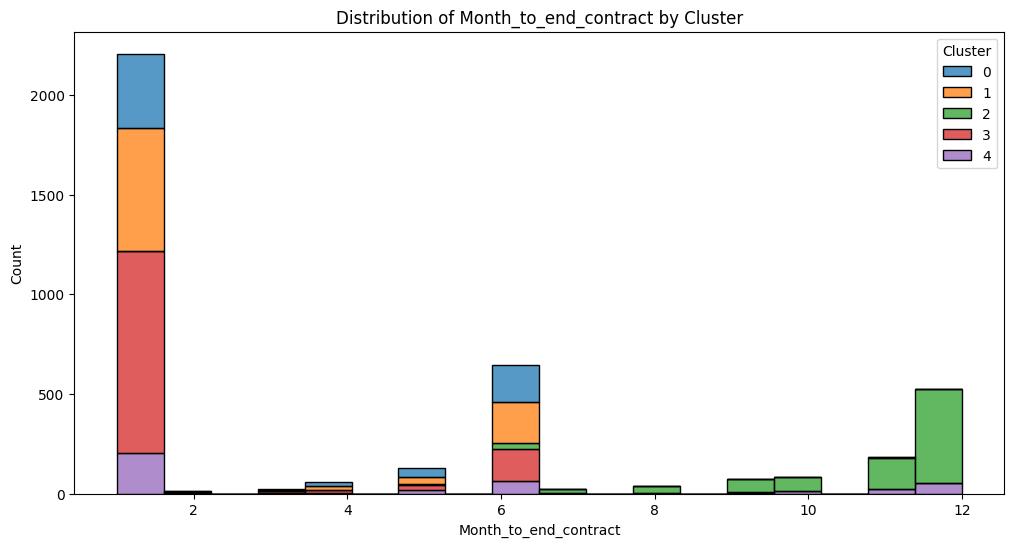

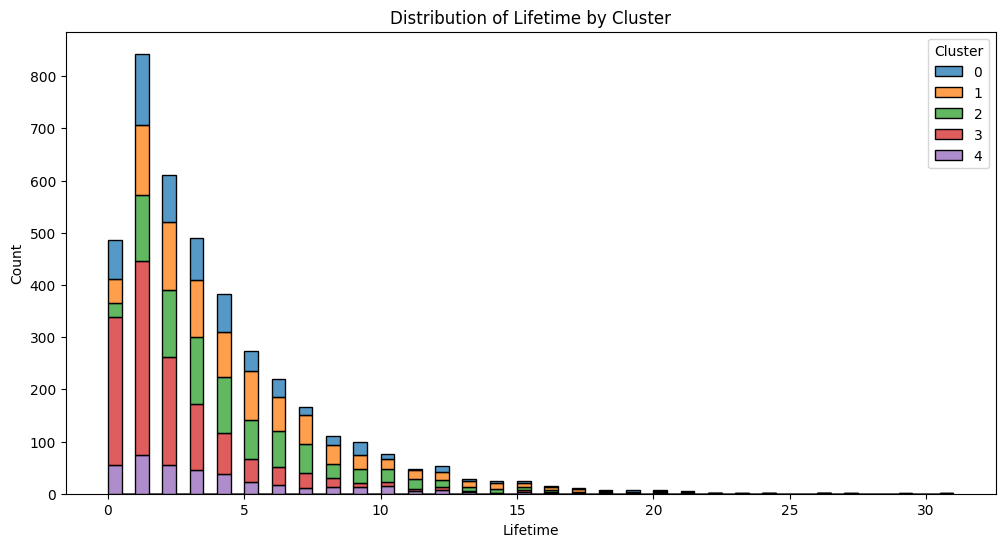

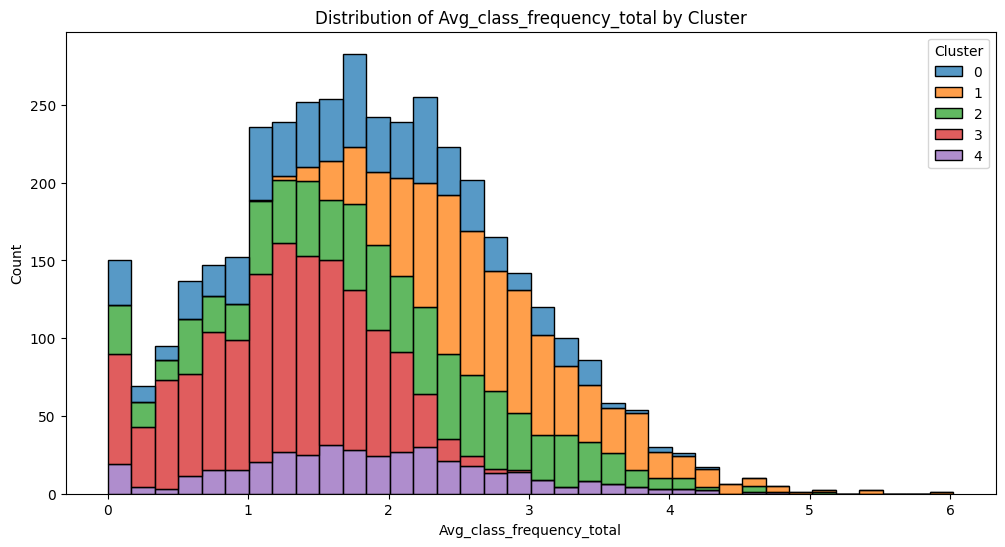

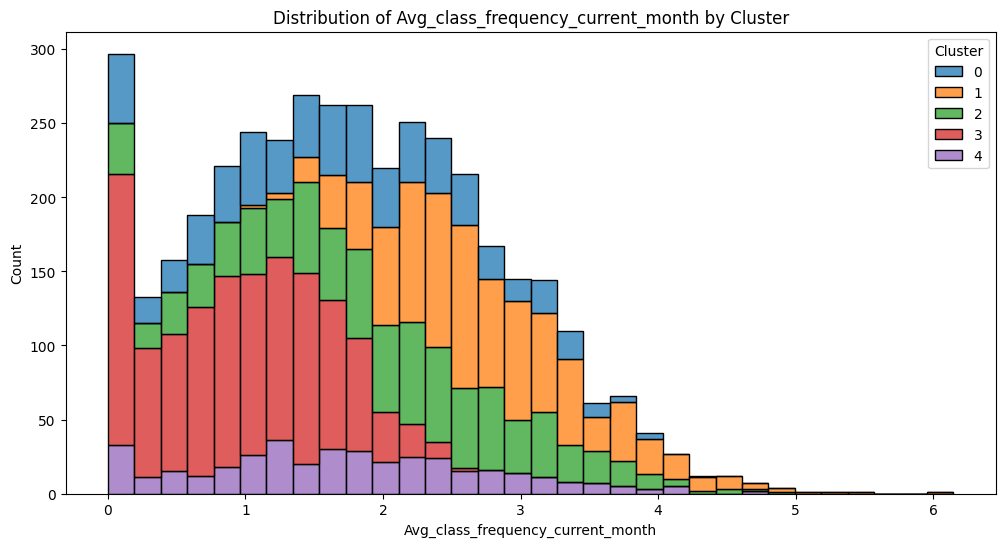

In [20]:
# Plot distributions of features for each cluster
features = gym.columns.drop(['Churn', 'Cluster'])

for feature in features:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=gym, x=feature, hue='Cluster', multiple='stack', palette='tab10')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()


In [21]:
# Calculate the churn rate for each cluster
churn_rate = gym.groupby('Cluster')['Churn'].mean()
print("Churn rate for each cluster:\n", churn_rate)

Churn rate for each cluster:
 Cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: Churn, dtype: float64


¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

Hay 3 clusters que tienen una alta tasa de cancelacion. Me ire primero por los que tienen un 25% aproximadamente, tienen en comun entre ellos la edad de 29 años, les queda relativamente cerca el gimnasio a la mayoria, pero el cluster 0 casi en su totalidad, viene de una promo amigo, y el 30% del cluster 4 solo viene de esa promo.

El cluste 3 es el que tiene la tasa mas alta en un 57%, tiene una edad de 28 años, solo el 70% vive cerca del gimnasio, solamente el 1% viene de promocion, contrato mensual, y es el menos gastos adicionales tiene.

## Conclusiones

Con base en los analisis realizados, se recomienda enfatizar una estrategia para las personas dee 28 años que vivan cerca del gimnasio, ya que es donde mas tasa de cancelacion tenemos. Tambien ofrecer promociones de pago a un año para evitar cancelaciones, ya que acorde a los datos el grupo con menos cancelacion, son los que pagan anual. Ya sea 14x12 meses, o meses sin intereses en pago anual.

Logrando que se inscriban de manera anual, tambien podemos incrementar los gastos adicionales que ellos a